In [67]:
%matplotlib inline
import cv2
import dlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

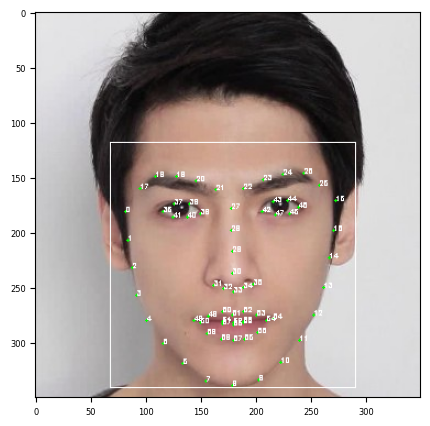

In [68]:
plt.rcParams['font.size'] = 6
plt.rcParams['figure.figsize'] = (5,5)

detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
img = cv2.imread('lyx.jpg')
faces = detector(img,1)
if (len(faces) > 0):
    for k,d in enumerate(faces):
        cv2.rectangle(img,(d.left(),d.top()),(d.right(),d.bottom()),(255,255,255))
        shape = landmark_predictor(img,d)
        for i in range(68):
            cv2.circle(img, (shape.part(i).x, shape.part(i).y),1,(0,255,0), -1, 8)
            cv2.putText(img,str(i),(shape.part(i).x,shape.part(i).y),cv2.FONT_HERSHEY_SIMPLEX,0.2,(255,255,255))
#cv2.imshow('Frame',img)
b, g, r = cv2.split(img)
plt.imshow(cv2.merge([r, g, b]))

In [69]:
def get_facial_landmarks(image, predictor):
    # detect face(s)
    dets = detector(image, 1)
    shape = np.empty([1,1])
    for k, d in enumerate(dets):
        # Get the landmarks/parts for the face in box d.
        shape = predictor(image, d)
        shape = shape_to_np(shape)
    return shape
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords


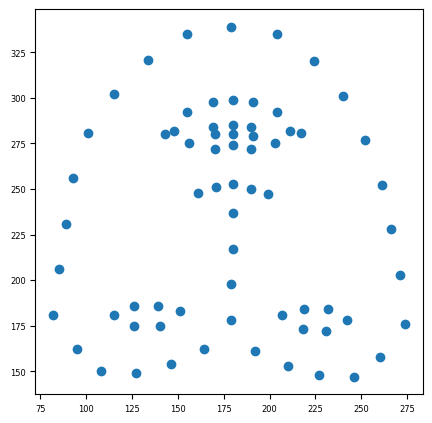

In [70]:
landmarkxy = get_facial_landmarks(img, landmark_predictor)
plt.scatter(landmarkxy[:,0], landmarkxy[:,1])

In [71]:
from sklearn.linear_model import LinearRegression
symmetrylist = [8, 27, 28, 29, 30, 33, 51, 57, 62, 66]
middlexy = np.zeros((len(symmetrylist),2))
for i in range(len(symmetrylist)):
    middlexy[i][0], middlexy[i][1] = landmarkxy[symmetrylist[i]][0], landmarkxy[symmetrylist[i]][1]
middlexy


array([[179., 339.],
       [179., 178.],
       [179., 198.],
       [180., 217.],
       [180., 237.],
       [180., 253.],
       [180., 274.],
       [180., 299.],
       [180., 280.],
       [180., 285.]])

In [72]:
x = middlexy[:,0]
y = middlexy[:,1]
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [73]:
model = LinearRegression()
model.fit(y,x)
predicts = model.predict(y)
print("斜率： ", model.coef_[0][0])
print("截距： ", model.intercept_[0])

斜率：  0.0024291869098909164
截距：  179.07812815106792


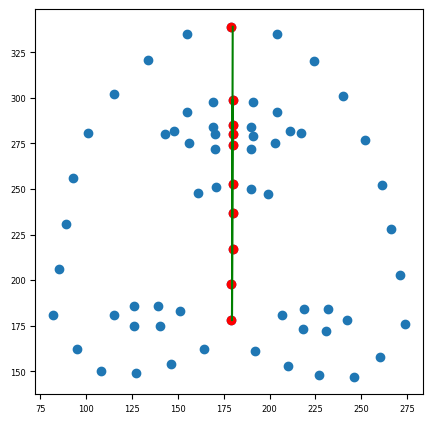

In [74]:
plt.scatter(landmarkxy[:,0], landmarkxy[:,1])
plt.scatter(middlexy[:,0],middlexy[:,1], color="red")
plt.plot(predicts, y, color="green")

In [75]:
pairs = np.array([[21, 22],[20, 23],[19, 24],[18, 25],
                 [17, 26],[39, 42],[38, 43],[37, 44],
                 [36, 45],[41, 46],[40, 47],[31, 35],
                 [32, 34],[0, 16],[1, 15],[2, 14],
                 [3, 13],[4, 12], [5, 11], [6, 10],
                 [7, 9],[48, 54],[60,64],[49,53],
                 [50, 52],[61, 63],[67,65],[59, 55],[58,56]])
len(pairs)

29

In [76]:
symmetryx, symmetryy = 0, 0
mpoint = model.intercept_[0]
for i in range(len(pairs)):
    left, right = pairs[i][0], pairs[i][1]
    lx, ly = landmarkxy[left][0], landmarkxy[left][1]
    rx, ry= landmarkxy[right][0], landmarkxy[right][1]
    symmetryx += np.abs(np.abs(mpoint-lx)-np.abs(mpoint-rx))
    symmetryy += np.abs(ly-ry)
print(symmetryx/np.max(landmarkxy[:,0]), symmetryy/np.max(landmarkxy[:,1]))

0.20472187633193725 0.14454277286135694
